<a href="https://colab.research.google.com/github/FelipeFlorezO/Machine_Learning/blob/main/ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importación de librerías de manejo numérico y procesamiento de datos:
import numpy as np
import pandas as pd
#Importación de scikit-learn, librería base para algoritmos de ML:
import sklearn
#Importación de los datasets de scikit-learn:
from sklearn import datasets
#Importación de librerías de scikit-learn para manejo de regresión lineal/logística:
from sklearn import linear_model
#Importación de librerías de scikit-learn para clasificación de bosque aleatorio:
from sklearn.ensemble import RandomForestClassifier
#Importación de librerías de scikit-learn para clusterización con k-means:
from sklearn.cluster import KMeans
#Importación de librerías para performance de modelos:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
#Importación librerías para graficar:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#Definir tamaño del gráfico:
plt.rcParams['font.size']=15

Uso del Iris Dataset

In [ ]:
#Carga del Iris Dataset:
iris = datasets.load_iris()
#Impresión de datos:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
#Creando el DF en con los feature names:
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
#Creando el DF con los targets(las especies de la flor):
target = pd.DataFrame(data=iris.target, columns=['species'])
#Uniendo ambos DF con concat; agregando una nueva columna:
data = pd.concat([data,target], axis=1)
#Mezclando en orden aleatorio:
data = data.sample(frac=1, random_state=1234)
#Impresión de los primeros registros del nuevo DF:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
91,6.1,3.0,4.6,1.4,1
63,6.1,2.9,4.7,1.4,1
103,6.3,2.9,5.6,1.8,2
6,4.6,3.4,1.4,0.3,0
59,5.2,2.7,3.9,1.4,1


Ahora se divide el conjunto de datos en entrenamiento (Training) y pruebas (Testing). Una buena regla es que la mayoría de los datos deben incluirse en entrenamiento, pues estos se utilizan para ayudar a nuestros modelos a aprender las "reglas" o patrones subyacentes dentro de los datos.

Por otro lado, el conjunto de pruebas debe separarse del conjunto de entrenamiento. Su objetivo es evaluar el modelo que hizo, lo que significa que verificamos si los patrones detectados en el modelo reflejan lo que estamos tratando de modelar.

También es posible realizar una validación, la cual se aplica para modelos más complicados donde se requieren parámetros de ajuste de un modelo. 

Una división del 80/20 por ciento de entrenamiento/pruebas puede ser razonable de manera elemental.

In [ ]:
#Fraccioón de entrenamiento 0.8:
Ntrain = int(data.shape[0]*0.8)
#Datos de entrenamiento:
train = data.iloc[:Ntrain, :]
#Datos de prueba:
test = data.iloc[Ntrain, :]

Regresión lineal:

Intenta predecir una salida de valor numérico. Para este ejemplo, se quiere predecir el ancho del pétalo (con índice=3 en el DF). Para comenzar, se construye un modelo con solo 1 feature, el petal length o largo del pétalo (índice=2 en el DF).
Primero se observa la relación entre petal length y petal width en los datos:

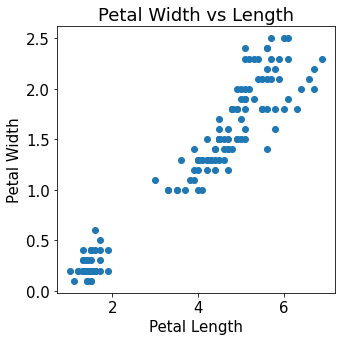

In [ ]:
#Definir variables de acceso simple:
plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]
#Crear la gráfica comparando Petal length (eje x) vs Petal width(eje y):
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Width vs Length")
f.tight_layout()

Se observa una relación lineal, la cual debe cuantificarse.

In [ ]:
#Importar un objeto de regresión lineal de sklearn:
model_l = linear_model.LinearRegression()
#Ajustar el modelo a los datos:
model_l.fit(pd.DataFrame(train.iloc[:,2]), train.iloc[:,3])
#Imprimir los coeficientes:
print("Coef\n", model_l.coef_)
#Imprimir el sesgo o bias:
print("\n\nBias\n", model_l.intercept_)

Coef
 [0.41490802]


Bias
 -0.357589314248546


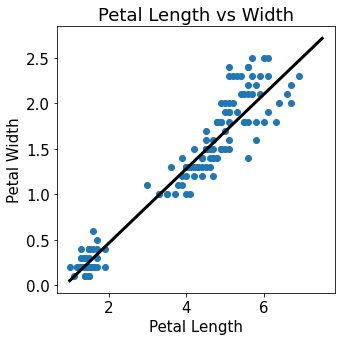

In [ ]:
#Definir variables para acceder de forma más simple:
plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]
#Definir un arreglo desde el min hasta el max de petal length:
xvals = np.arange(plength.min(),plength.max()+1, 0.5)
#Ecuación de nuestra regresión lineal:
yvals = 0.41*xvals - 0.36
#Gráfica de la recta con los datos y la ecuación:
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.plot(xvals, yvals, 'k', linewidth=3)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length vs Width")
f.tight_layout()

Ahora se debe cuantificar qué tan bueno es el ajuste, para esto se hace uso de dos métricas de rendimiento: el error cuadrático medio (MSE) y R^2.
El valor de R^2 busca la correlación entre x y y, para este caso pregunta "qué tan bien se ajusta la línea a los puntos de nuestros datos". Siempre se querrá un MSE bajo y un R^2 cercano a 1. R^2 está limitado de 0 (no correlacionado) a 1(relación perfecta).

Podemos calcular nuestras métricas de rendimiento prediciendo primero en nuestro conjunto de datos de pruebas y luego viendo qué tan buena es la estimación de nuestro modelo del ancho del pétalo cuando se usa la longitud del pétalo, en comparación con los valores reales del ancho del pétalo.

In [ ]:
# Predicción con model_1 = linear_model.LinearRegression() utilizando los datos de prueba.
ypredict = model_l.predict(pd.DataFrame(test.iloc[:, 2]))

# Calculamos el MSE con los valores predichos en y.
print('MSE: %.2f'
      % mean_squared_error(pd.DataFrame(test.iloc[:, 3]), ypredict))

# Calculamos R^2 con los valores predichos en y.
print('R2: %.2f'
      % r2_score(pd.DataFrame(test.iloc[:, 3]), ypredict))

Regresión Logística:
Permite clasificar datos, en este caso usando el largo/ancho del sépalo y el largo/ancho del pétalo, se debe clasificar a qué especie de flor pertenece cada punto de datos.
Para esto podemos emplear regresión logística. En la regresión logística binaria, estamos tratando de ajustar un logaritmo de relación impar; es decir, una probabilidad de una clase particular en relación con la otra clase.
Scikit-learn puede manejar problemas de etiquetas binarias o de etiquetas múltiples con mucha facilidad. Para construir un modelo de regresión logística se puede utilizar:

In [ ]:
# Preparamos los datos de entrenamiento y prueba en x y y.
# La última columna es la etiqueta de la especie..
xtrain = train.iloc[:, :-1] # input, training
ytrain = train.iloc[:, -1] # output, training
xtest = test.iloc[:, :-1] # input, test
ytest = test.iloc[:, -1] # output, test

# Configuramos la regresión logística con el método de regresión logística de linear_model.
model_2 = linear_model.LogisticRegression()

# Ajustamos el modelo con los datos de entrenamiento.
model_2.fit(xtrain, ytrain)

In [ ]:
# Hacer predicciones con el conjunto de prueba.
ypred = model_2.predict(xtest)

# Probamos el accuracy del modelo generado
print("Testing accuracy =", accuracy_score(ytest, ypred))

Matriz de confusión:

In [ ]:
#Importamos el método de matriz de confusión desde sklearn
from sklearn.metrics import confusion_matrix

#Aplicamos la matriz a nuestros valores de testing y los valores de predicción generados.
confusion_matrix(ytest, ypred)

Bosque Aleatorio:

In [ ]:
# Creamos el clasificador
clf = RandomForestClassifier(n_estimators=3)

# Entrenamos el modelo
clf.fit(xtrain, ytrain)

# Generamos predicción 
y_pred=clf.predict(xtest)

# Probamos el modelo con accuracy
print("Testing accuracy =", accuracy_score(ytest, ypred))

Clustering K-Means/ K-Medias

In [ ]:
# Inicializamos el modelo KMeans.
k2model = KMeans(n_clusters=2, random_state=42)

# Ajustar todos los puntos de datos EXCEPTO para la especie.
k2model.fit(data[["petal length (cm)", "petal width (cm)"]])

# Calculamos e imprimimos la inercia desde el modelo de Kmeans.
print("Inertia =", k2model.inertia_)

# Cálculamos e imprimimos la posición de los clústers.
print("Centroids (x, y) =\n", k2model.cluster_centers_)

Inertia = 86.39021984551397
Centroids (x, y) =
 [[1.49215686 0.2627451 ]
 [4.92525253 1.68181818]]


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


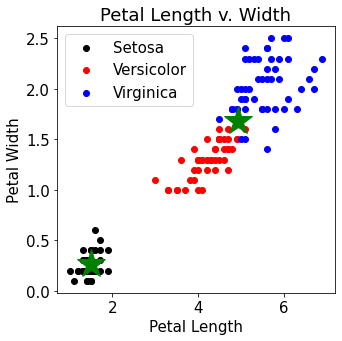

In [ ]:
# Graficamos los datos con la línea para setosa.
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)

# Setosa
ax.scatter(data[data.iloc[:, -1]==0]["petal length (cm)"],
           data[data.iloc[:, -1]==0]["petal width (cm)"],
           c='k')

# Versicolor
ax.scatter(data[data.iloc[:, -1]==1]["petal length (cm)"],
           data[data.iloc[:, -1]==1]["petal width (cm)"],
           c='r')

# Virginica
ax.scatter(data[data.iloc[:, -1]==2]["petal length (cm)"],
           data[data.iloc[:, -1]==2]["petal width (cm)"],
           c='b')

ax.legend(["Setosa", "Versicolor", "Virginica"])

# Graficamos los centroides de los clústers (output en Petal Length x Petal Width)
ax.plot(k2model.cluster_centers_[:,0],
        k2model.cluster_centers_[:,1],
        "g*", markersize=30)

ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
f.tight_layout()